# Question

- Consider a circle of unit radius

**Steps**
1. Randomly pick a point $p_{1}$ on the circumference of the circle
2. From $p_{1}$, draw a horizontal line that intersects the circle's circumference at another point across from it
    - Label this point $p_{2}$
3. Then, draw a vertical line through $p_{1}$ that intersects the circle's circumference above/below it
    - Label this point $p_{3}$
4. Finally, draw a horizontal line from $p_{3}$, and a vertical line from $p_{2}$, to connect a fourth point
    - Label this point $p_{4}$


- After we've completed the steps, we have a circle with a rectangle inside it

<img src="images/circle_20241010.png" width="500" height="500">

- $p_{1}$ is uniformly distributed
-  $A$ is the random variable representing the area of the rectangle

### *What is $E(A)$*?

_____

# Solution

- Wherever $p_{1}$ lands, we can represent its location on the circumference of the circle as $\theta$
    - We can measure $\theta$ from any starting place, so we'll pick midnight

<img src="images/circle_w_theta_20241010.png" width="500" height="500">

- We know from grade 11 physics that the vector from the center of the circle to $p_{1}$ can be broken down into two vectors
    - The length of the vectors are $\sin\theta$ and $\cos\theta$

<img src="images/circle_w_sin_cos_20241010.png" width="500" height="500">

- So, looking at the chart, it's clear that the dimensions of the rectangle are:

$$
\text{width} = 2\sin\theta
$$

$$
\text{height} = 2\cos\theta
$$

<img src="images/circle_w_lengths_20241010.png" width="500" height="500">

- Now, we can calculate the area

$$
A = \text{height} \cdot \text{width} = \left (2\cos\theta \right )\left (2\sin\theta \right ) = 4\cos\theta\sin\theta
$$

- Before we proceed: *what do we know about $\sin(\theta)$ and $\cos(\theta)$?*
    - They have values between 1 and -1
        - Therefore, $4\cos\theta\sin\theta$ may be negative
            - Since area can't be negative, this is actually:
         
$$
A = 4|\cos\theta\sin\theta|
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

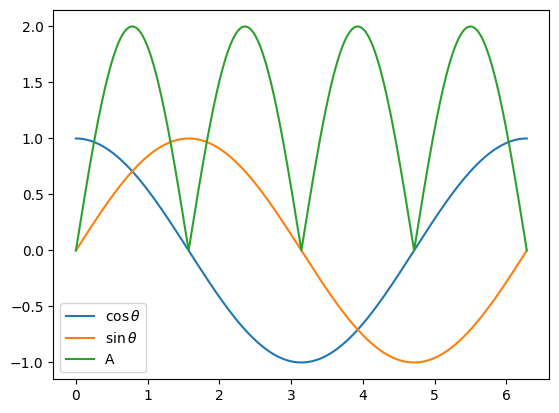

In [2]:
theta = np.arange(0, 2*np.pi, 0.001)
cos_theta = np.cos(theta)
sin_theta = np.sin(theta)
A = np.abs(4 * cos_theta * sin_theta)

plt.plot(theta, cos_theta, label = r"$\cos\theta$")
plt.plot(theta, sin_theta, label = r"$\sin\theta$")
plt.plot(theta, A, label='A')
plt.legend()

- This chart makes sense because every $\pi / 2$ degrees, the area:
    - Starts at zero
    - Peaks at the maximum area at the midway point
    - Goes back down to zero
- Therefore, calculating the expected value of the $A$ across the whole circumference is like calculating the expected value of $A$ between 0 and $\pi / 2$ **four separate times**
    - We can save ourselves the hassle by only doing it once (i.e. only consider angles between 0 and $\pi / 2$)
        - This also makes it easier since neither $\sin\theta$ nor $\cos\theta$ goes negative in that range

- $\theta$ is uniformly distributed between 0 and $\pi / 2$
    - So, the expected value of A is:
 
$$
E(A) =\int_{0}^{\pi / 2}A(\theta)f(\theta)d\theta
$$

- The density function $f$ for a uniform distribution is:
 
$$
f(x) = \frac{1}{b - a}
$$

- Since we're only considering $\theta$ values between 0 and $\pi / 2$:

$$
f(\theta) = \frac{1}{\pi / 2 - 0} = 2 / \pi
$$

- So:

$$
E(A) = \int_{0}^{\pi/2} 4\cos\theta\sin\theta \cdot (2 / \pi) d\theta = 8 / \pi \int_{0}^{\pi/2}\cos\theta\sin\theta d\theta
$$

- Tbh this is as far as I'm gonna go here lol
    - Not gonna bother with actually intergrating it
        - We'll skip ahead to:
     
$$
\int_{0}^{\pi/2}\cos\theta\sin\theta d\theta = 1 / 2
$$

$$
\implies E(A) = 8 / \pi \cdot (1 / 2) =  4 / \pi
$$

_____

# Tieout

### 1. Monte Carlo

In [3]:
N_trials = 1000000  # one million trials
random_theta_values = np.random.uniform(low=0.0, high= np.pi / 2, size=N_trials)

In [4]:
area_for_random_theta_values = 4 * np.cos(random_theta_values) * np.sin(random_theta_values)

In [5]:
np.mean(area_for_random_theta_values)

np.float64(1.2731845424522457)

In [6]:
4 / np.pi

1.2732395447351628

### 2. Riemann Sum

In [7]:
step = 0.0001
theta = np.arange(0, np.pi / 2, step)
f_theta = 2 / np.pi
area = 4 * np.cos(theta) * np.sin(theta)
riemann_sum = np.sum(f_theta * area * step)

In [8]:
riemann_sum

np.float64(1.273239540941539)

- Nice